## 訓練データと順伝搬の表示

訓練データと訓練前のモデルをプロットするため、以下ではnumpyでデータを準備します。
実際の訓練等は２つ目のセルから始まります。

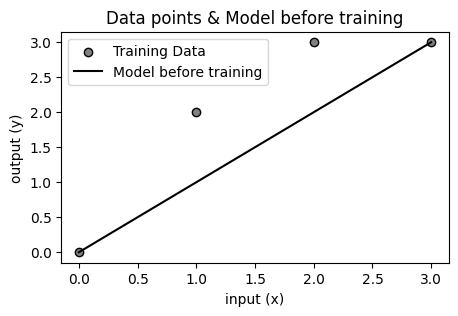

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 訓練データ
x_train = np.array([0, 1, 2, 3])
y_train = np.array([0, 2, 3, 3])

# numpy１時間数モデル
w = 1
y_pred_numpy = w * x_train

plt.figure(figsize=(5, 3))
plt.scatter(x_train, y_train, color='gray', edgecolors='black', label='Training Data')
plt.plot(x_train, y_pred_numpy, color='k', label='Model before training')
plt.title('Data points & Model before training')
plt.xlabel('input (x)')
plt.ylabel('output (y)')
plt.legend()
plt.show()

訓練データを Tensor で準備します。モデル "net"が今回フィットするモデルで、Tensorの傾き "w" をパラメータとした１次関数です。

最適化アルゴリズム torch.optim.SGD に iterable の形でパラメータ "[w]" を渡します。

まずはoptimizer のzero_grad() でパラメータを初期化します。

In [2]:
import torch

# 訓練データ
x_train = torch.tensor([0, 1, 2, 3])  # 入力（テンソル）データ
y_train = torch.tensor([0, 2, 3, 3]) # 正解（テンソル）データ

# 傾きwの1次関数のモデル
# 普通はクラスとして定義、パラメータはその内部で保持する。ここではシンプルに関数として定義。
w = torch.tensor([1.0], requires_grad=True)  # パラメータの初期設定 (テンソル w)。勾配を計算したいので requires_grad=True を設定
def net(x, w):
  return w * x

# 最適化アルゴリズム
optimizer = torch.optim.SGD([w], lr=0.01) # パラメータ w を iterable (list) :[w] として optimizer にわたす
optimizer.zero_grad()

## 逆誤差伝搬

まずは訓練データ x_train で順伝播を計算し、モデルの予測値 y_pred を求めます。

次にその結果を正解 y_pred と比べて損失を計算し、loss.backward() で勾配を求めます。
勾配はw.gradで見れます。

optimizer.step() で w が更新されます。

w.grad をみると loss の w に関する勾配は -6 なので、-lr = -0.01をかけた +0.06 が w の更新分となり、

実際、w は 1 から 1.06 に増加しています。

In [3]:
# 順伝播 (Forward)
y_pred = net(x_train, w)  # 簡単のため、モデルと出力を同時に作る

# 損失関数（MSE）
loss = torch.sum((y_pred - y_train)**2)

# 逆伝播 (requires_grad で変数とみなされた w について勾配を計算)
loss.backward()

optimizer.step() # パラメータの更新

# 勾配の確認
print(f"w.grad: {w.grad}") # 全データについて勾配が足し合わされ、grad属性に値が入る
print(f"w: {w}") # 先ほど求めた勾配 x (-1) x lr になる

w.grad: tensor([-6.])
w: tensor([1.0600], requires_grad=True)


## パラメータ更新

今回の学習は、データ数が４つ (x_train, y_trainが４ペア)で１バッチ、１エポックの学習に相当します。

学習により、モデルはよりデータ全体を説明するように傾きが増加していることがわかります（下図赤）。

エポックを繰り返すことで傾きはさらに変化し、徐々に値が収束します。

ぜひ自分でエポック数を増やして試してみてください。

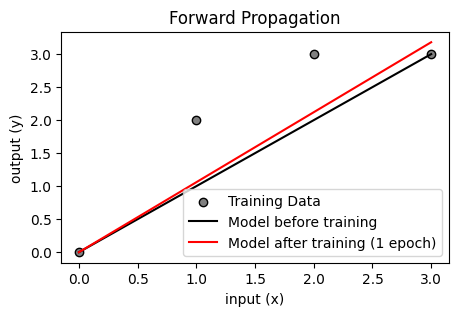

In [4]:
plt.figure(figsize=(5, 3))
plt.scatter(x_train, y_train, color='gray', edgecolors='black', label='Training Data')
plt.plot(x_train, y_pred_numpy, color='k', label='Model before training')
plt.plot(x_train, x_train * w.item(), color='r', label='Model after training (1 epoch)')
plt.title('Forward Propagation')
plt.xlabel('input (x)')
plt.ylabel('output (y)')
plt.legend(loc='lower right')
plt.show()